In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx

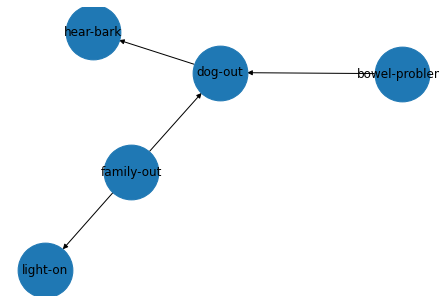

In [2]:
dog_network = BayesNet()
dog_network.load_from_bifxml('testing/dog_problem.BIFXML')
dog_network.draw_structure()
reasoner = BNReasoner(dog_network)

**D-Seperation example:**

There is no path between X and Y given Z, therefore it is d-seperated.


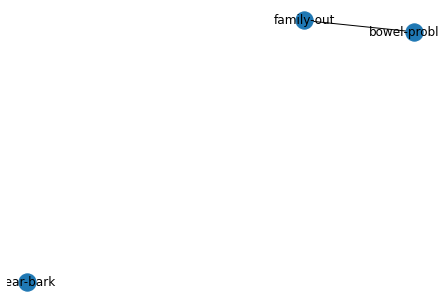

In [3]:
d_sep = reasoner.d_seperation(['family-out'], ['hear-bark'], ['dog-out'])
if d_sep:
    print("There is no path between X and Y given Z, therefore it is d-seperated.")
else:
    print("There is a path between X and Y given Z, therefore it is not guaranteed they are independent of each other .")

**Ordering examples:**

['light-on', 'hear-bark', 'bowel-problem', 'dog-out', 'family-out']
['light-on', 'bowel-problem', 'hear-bark', 'dog-out', 'family-out']


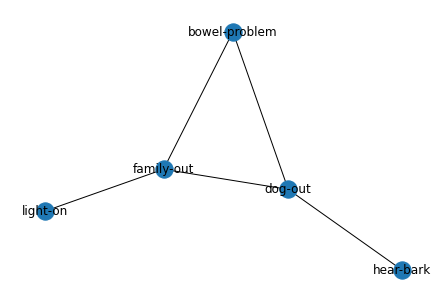

In [4]:
# Min_degree
nx.draw(dog_network.get_interaction_graph(), with_labels=True)
result_min_degree = reasoner.min_degree_order(dog_network.get_all_variables())
print(result_min_degree)
# Min_fill
result_min_fill = reasoner.min_fill_order(dog_network.get_all_variables())
print(result_min_fill)

**Pruning:**

{'bowel-problem':    bowel-problem     p
0          False  0.01
1           True  0.99, 'dog-out':    family-out  dog-out     p
0       False    False  0.99
1       False     True  0.01
2        True    False  0.90
3        True     True  0.10, 'family-out':    family-out     p
0       False  0.15
1        True  0.85}


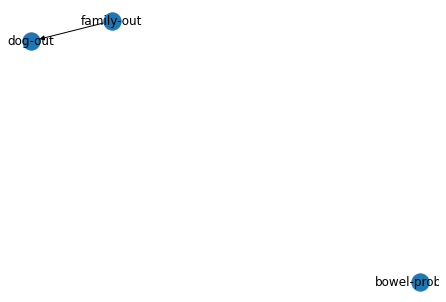

In [5]:
# pruned_graph, cpts = reasoner.prune_network(['dog-out'])
pruned_graph, cpts = reasoner.prune_network(['dog-out'], [('light-on', True), ('bowel-problem', False)])
nx.draw(pruned_graph, with_labels=True)
print(cpts)

**Marginal Distributions:**

In [6]:
# # Prior marginal
prior = reasoner.prior_marginal(['hear-bark', 'dog-out', 'bowel-problem', 'family-out'])
print(prior)
# Joint marginal distribution 
joint = reasoner.joint_marginal(['hear-bark', 'dog-out'], [('bowel-problem', False), ('family-out', True)])
print(joint)
# Posterior marginal distribution 
posterior = reasoner.posterior_marginal(['hear-bark', 'dog-out'], [('bowel-problem', False), ('family-out', True)])
print(posterior)

   bowel-problem family-out dog-out hear-bark         p
0          False      False   False     False   0.00104
1          False      False   False      True  0.000445
2          False      False    True     False       0.0
3          False      False    True      True  0.000015
4          False       True   False     False  0.005355
5          False       True   False      True  0.002295
6          False       True    True     False  0.000008
7          False       True    True      True  0.000842
8           True      False   False     False  0.100831
9           True      False   False      True  0.043213
10          True      False    True     False  0.000045
11          True      False    True      True   0.00441
12          True       True   False     False  0.176715
13          True       True   False      True  0.075735
14          True       True    True     False   0.00589
15          True       True    True      True  0.583159
  dog-out hear-bark         p
0   False     Fals

**MPE and MAP**

   light-on bowel-problem dog-out hear-bark family-out         p
31     True          True    True      True       True  0.233419
   light-on bowel-problem dog-out hear-bark family-out         p
29     True          True    True     False       True  0.004003
